<a href="https://colab.research.google.com/github/Shobana0608/Learnbay-Project/blob/main/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/Churn_Modelling.csv')

# data shape
data.shape

(10000, 14)

In [ ]:
# data sample
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# missing value check
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# data type of the columns
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


# Prepare the data for DL

In [ ]:
# data sample
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# dependency split
x = data.iloc[:, 3:-1]
y = data['Exited']

In [ ]:
# categorical data
for cols in x:
    if x[cols].dtype == 'O':
        print(cols, x[cols].unique())


Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']


In [ ]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train data encoding
encoder = OneHotEncoder(sparse_output=False, dtype='int', drop='first')
trn_encoded = encoder.fit_transform(x_train[['Geography', 'Gender']])
trn_encoded_df = pd.DataFrame(trn_encoded, index=x_train.index, columns=encoder.get_feature_names_out())
x_train_concat = pd.concat([x_train.drop(['Geography', 'Gender'], axis=1), trn_encoded_df], axis=1)

# train data scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train_concat)

In [ ]:
# test data encoding
tst_encoded = encoder.transform(x_test[['Geography', 'Gender']])
tst_encoded_df = pd.DataFrame(tst_encoded, index=x_test.index, columns=encoder.get_feature_names_out())
x_test_concat = pd.concat([x_test.drop(['Geography', 'Gender'], axis=1), tst_encoded_df], axis=1)

# test data scaling
x_test_scaled = scale.transform(x_test_concat)

In [ ]:
# optional step - conver the scaled output array to data frame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_concat.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test_concat.columns)

# data sample
x_train_scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388,0.913248
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388,0.913248
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942,0.913248
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388,-1.094993
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388,0.913248


In [ ]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(8000, 11)
(2000, 11)


# BUILDING ANN ARCHITECTURE

1. Initialize the sequential model.
2. Add layers (input, hidden, output) along with activation function and weight intializers.
3. Metrics, Loss Funtion, Optimizers.

In [ ]:
# Importing the required libraries from keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# version of keras
print(keras.__version__)

3.10.0


In [ ]:
# Building the ANN

# --- FEED FORWARD MECHANISM --- #

# Initialize the model
model = Sequential()

# Build the layers
# Input Layer
model.add(Dense(units=len(x_train_scaled[0]),           # units : no.of.neurons
                kernel_initializer = 'he_uniform',      # weights
                input_dim = len(x_train_scaled[0])))

# First hidden layer
model.add(Dense(units=8,
                kernel_initializer = 'he_uniform',
                activation='sigmoid'))

# First hidden layer
model.add(Dense(units=6,
                kernel_initializer = 'he_uniform',
                activation='sigmoid'))

# Output layer
model.add(Dense(units=1,
                activation='sigmoid'))                  # sigmoid - binary classification


# --- BACK PROPAGATION --- #
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# summary of the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the data onto the architecture
model_hist = model.fit(x_train_scaled, y_train, validation_split=0.2, batch_size=10, epochs=100)

# 8000 --> 6400, 1600

Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7928 - loss: 0.5155 - val_accuracy: 0.7987 - val_loss: 0.5021
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7957 - loss: 0.5052 - val_accuracy: 0.7987 - val_loss: 0.4934
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7841 - loss: 0.5124 - val_accuracy: 0.7987 - val_loss: 0.4850
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7962 - loss: 0.4880 - val_accuracy: 0.7987 - val_loss: 0.4767
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7845 - loss: 0.4966 - val_accuracy: 0.7987 - val_loss: 0.4680
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.4789 - val_accuracy: 0.7987 - val_loss: 0.4593
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7944 - loss: 0.4673 - val_accuracy: 0.7987 - val_loss: 0.4510
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.4752 - val_accu

In [ ]:
# train ,test split --> 8000, 2000 dps
# train , validation split --> 6400, 1600 dps

# total dps for batch training = 6400 dps (after validation split)

# 1. Number of batches per epoch

#     * (6400 / 10) = 640 batches per epoch

# 2. what happens in 1 epoch

#     * The model sees 640 Batch, in each batch it process 10 sample of data points
#     * After each batch, the model weights are updates using gradient calculated from the 10 samples

# 3. in each epoch

#     * Forward pass is done for 10 sample
#     * Loss is computed
#     * Backward pass (back propagation) updates weights based on gradiet from those 10 samples


# Model weights are updates 640 times in 1 epoch


In [ ]:
# Calculation of data splits and batches
print('Number of rows in the data:', data.shape[0])
print('Number of rows in train data:', x_train.shape[0])
print('Number of rows in test data:', x_test.shape[0])
print('Number of rows in compile train data:', int(x_train.shape[0]*0.8))
print('Number of rows in compile validation data:', int(x_train.shape[0]*0.2))
print('Batch Size (samples/batch):', 10)
print('Epochs:', 100)
print('Number of batches/epoch (compile_train/batchsize):', int((x_train.shape[0]*0.8)/10))

Number of rows in the data: 10000
Number of rows in train data: 8000
Number of rows in test data: 2000
Number of rows in compile train data: 6400
Number of rows in compile validation data: 1600
Batch Size (samples/batch): 10
Epochs: 100
Number of batches/epoch (compile_train/batchsize): 640


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


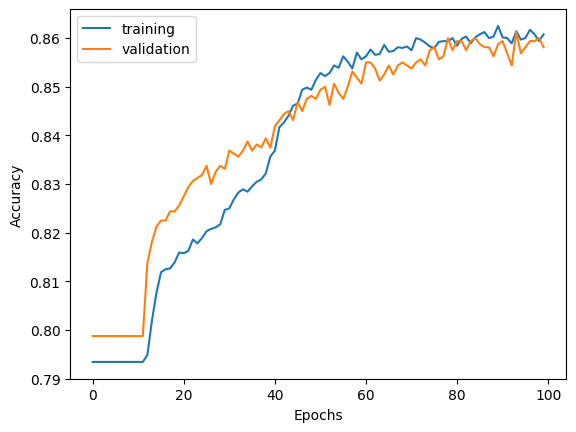

In [ ]:
# plot the accuracy vs val_accuracy
print(model_hist.history.keys())

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


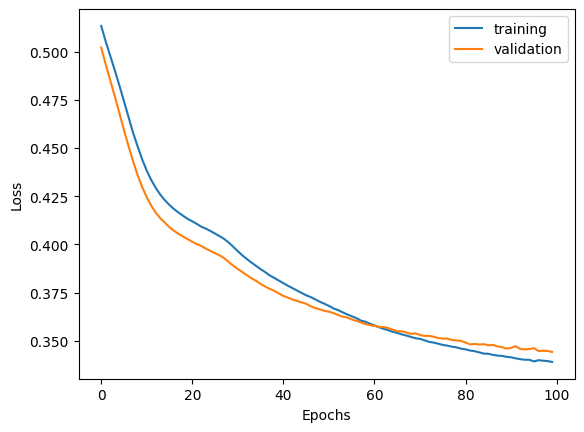

In [ ]:
# plot the loss vs val_loss
print(model_hist.history.keys())

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# Test Prediction
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Testing Acccuracy: 86.4 %


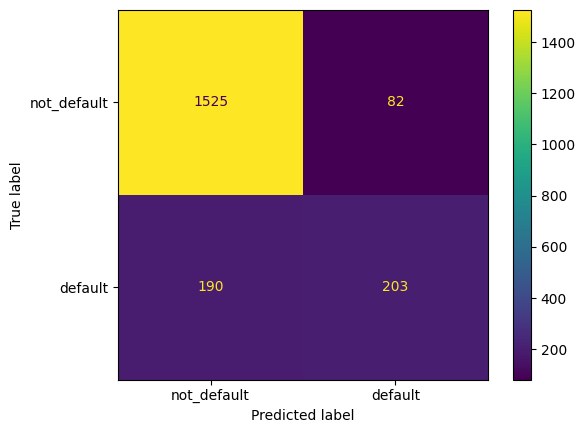

In [ ]:
# Validation Metrics
# Confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not_default', 'default'])

# classification report
print('Classification Report:\n\n', classification_report(y_test, y_pred))

# testing accuracy
print('Testing Acccuracy:', round(accuracy_score(y_test, y_pred)*100, 2), '%')

In [ ]:
round(data['Exited'].value_counts(normalize=True)*100, 2)

,proportion
Exited,
0,79.63
1,20.37
